In [80]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sqlalchemy import create_engine
from urllib.parse import quote_plus
from sqlalchemy import text
import json

In [81]:
import glob
# Use glob to get all filepaths that match the pattern (*=wildcard)
tmdb_files = sorted(glob.glob("MovieData/final_tmdb_data_*.csv.gz"))
tmdb_files


['MovieData\\final_tmdb_data_[2001].csv.gz',
 'MovieData\\final_tmdb_data_[2002].csv.gz']

In [82]:
# Use read_csv in a list comprehension and combine with concat to load all files
df = pd.concat([pd.read_csv(f) for f in tmdb_files] )
df.head()


,imdb_id,adult,backdrop_path,belongs_to_collection,budget,genres,homepage,id,original_language,original_title,...,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count,certification
0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,tt0096056,0.0,/95U3MUDXu4xSCmVLtWgargRipDi.jpg,NaN,0.0,"[{'id': 18, 'name': 'Drama'}]",NaN,109809.0,en,Crime and Punishment,...,0.0,126.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,NaN,Crime and Punishment,0.0,5.333,12.0,NaN
2,tt0118926,0.0,/qR3Dk3ctnrrxkAI6I472RhamIbu.jpg,NaN,0.0,"[{'id': 80, 'name': 'Crime'}, {'id': 18, 'name...",NaN,20689.0,en,The Dancer Upstairs,...,5227348.0,132.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,"An honest man caught in a world of intrigue, p...",The Dancer Upstairs,0.0,6.196,51.0,R
3,tt0119980,0.0,NaN,NaN,0.0,"[{'id': 80, 'name': 'Crime'}, {'id': 18, 'name...",NaN,563364.0,en,Random Shooting in LA,...,0.0,91.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,NaN,Random Shooting in LA,0.0,0.000,0.0,NaN
4,tt0120679,0.0,/s04Ds4xbJU7DzeGVyamccH4LoxF.jpg,NaN,12000000.0,"[{'id': 18, 'name': 'Drama'}, {'id': 10749, 'n...",https://www.miramax.com/movie/frida,1360.0,en,Frida,...,56298474.0,123.0,"[{'english_name': 'French', 'iso_639_1': 'fr',...",Released,Prepare to be seduced.,Frida,0.0,7.428,1905.0,R


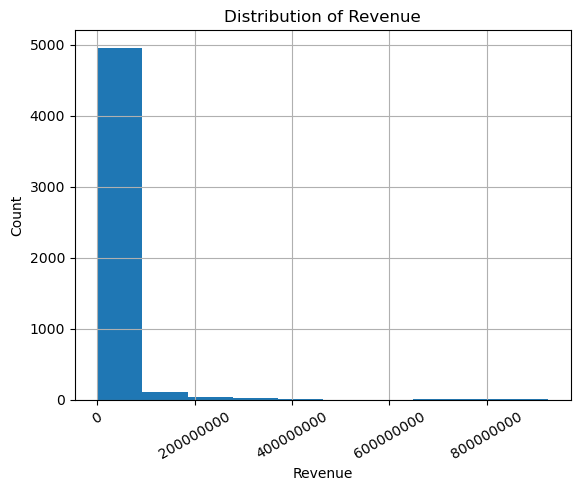

In [83]:
ax = df['revenue'].hist(bins=10)
ax.ticklabel_format(style='plain')
ax.tick_params(axis='x', rotation=30)
ax.set_xlabel('Revenue')
ax.set_ylabel('Count')
ax.set_title('Distribution of Revenue');

- From this we see there are almost 5,000 titles without revenue

## Remove Titles without revenue

In [84]:
no_revenue = df['revenue'] == 0

In [85]:
no_revenue.value_counts()

True     4056
False    1106
Name: revenue, dtype: int64

- 4,056 Titles without revenue will be removed for further EDA

In [86]:
no_budget = df['budget'] == 0

In [87]:
no_budget.value_counts()

True     3892
False    1270
Name: budget, dtype: int64

- 3,892 Titles without budget will be removed for further EDA

In [88]:
no_financial = no_revenue + no_budget

In [89]:
no_financial.value_counts()

True     4304
False     858
dtype: int64

In [90]:
df = df[~no_financial]

## How many movies are there in each of the certification categories (G/PG/PG-13/R)?

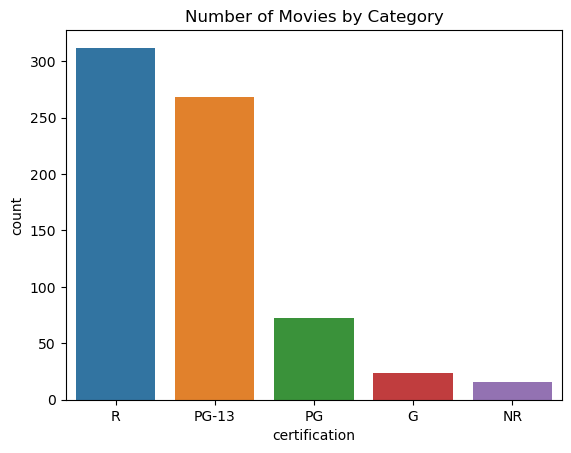

In [95]:
ax = sns.countplot(data=df, x='certification')
ax.set_title('Number of Movies by Category');

## What is the average revenue per certification category?

In [124]:
avg_revenue = df.groupby('certification')['revenue'].mean() *.000001
avg_revenue

certification
G        108.695069
NR         2.216595
PG       220.426659
PG-13    114.070214
R         40.459033
Name: revenue, dtype: float64

Text(0.5, 1.0, 'Avg Revenue by Certification')

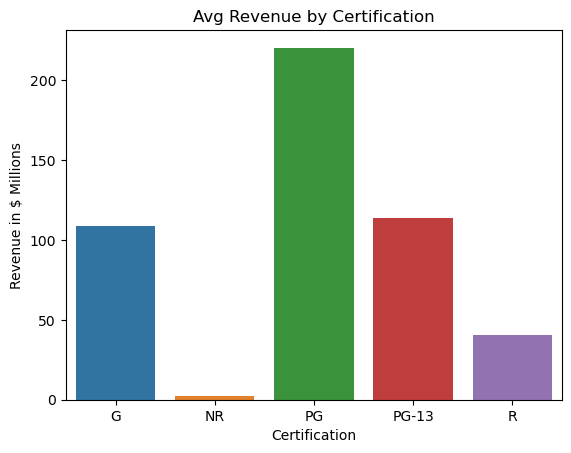

In [130]:
ax = sns.barplot(data=df, x=avg_revenue.index, y=avg_revenue.values)
ax.set_ylabel('Revenue in $ Millions')
ax.set_xlabel('Certification')
ax.set_title('Avg Revenue by Certification')

## What is the average budget per certification category?


In [132]:
avg_budget = df.groupby('certification')['budget'].mean() *.000001
avg_budget

certification
G        52.333333
NR        4.175000
PG       53.322222
PG-13    42.681058
R        26.250847
Name: budget, dtype: float64

Text(0.5, 1.0, 'Avg Budget by Certification')

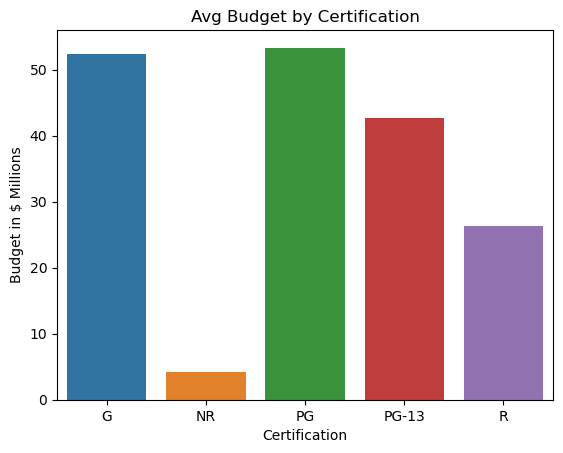

In [134]:
ax = sns.barplot(data=df, x=avg_budget.index, y=avg_budget.values)
ax.set_ylabel('Budget in $ Millions')
ax.set_xlabel('Certification')
ax.set_title('Avg Budget by Certification')